# Project Name :
##  Sonic Log Prediction using other Well Log Data with the help of ML alogrithms

### Main aim of this project is to predict the Sonic Log with the help of differnet well log data given.

In [27]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
df= pd.read_csv("well_18_ml_v1.csv")

In [29]:
df.head()

,wellName,DEPTH,CGR,CPERM,CPHI,DT,DTSM,Facies,GR,MSFL,NPHI,PEF,Perm_Buckles_UpAs,PHIE,RHOB,RT,SWE,ZONE_NAME,net_gross
0,A-18-00,852.857,4.91913,-9999.0,-9999.0000,74.5270,121.9698,1,33.3418,5.79568,0.079834,4.783249,0.931011,0.072167,2.74411,10.27150,0.737652,U.Asmari,gross
1,A-18-00,853.010,9.99433,-9999.0,-9999.0000,88.8155,141.6838,1,53.4034,2.36973,0.151655,4.399977,9.209792,0.146527,2.61065,2.98569,0.667624,U.Asmari,gross
2,A-18-00,853.162,20.56400,-9999.0,-9999.0000,99.0574,166.7016,5,72.0957,1.31614,0.231567,4.030700,1.601786,0.220162,2.47339,1.38781,0.643816,U.Asmari,gross
3,A-18-00,853.314,31.71550,-9999.0,-9999.0000,104.7870,182.5868,5,78.3783,1.20371,0.287493,3.732858,3.690761,0.276589,2.35818,1.22050,0.541710,U.Asmari,net
4,A-18-00,853.467,37.70880,-9999.0,0.4288,104.8980,185.0199,5,70.4172,1.42773,0.297283,3.520631,5.106259,0.301175,2.29512,1.55953,0.438343,U.Asmari,net


### We have the data of a well named "A-18-00" 
### My aim is to predict the Sonic Log outputs for varying depths in that well


In [30]:
df.columns


Index(['wellName', 'DEPTH', 'CGR', 'CPERM', 'CPHI', 'DT', 'DTSM', 'Facies',
       'GR', 'MSFL', 'NPHI', 'PEF', 'Perm_Buckles_UpAs', 'PHIE', 'RHOB', 'RT',
       'SWE', 'ZONE_NAME', 'net_gross'],
      dtype='object')

In [31]:
df =  df[['wellName', 'DEPTH', 'CGR', 'CPERM', 'CPHI', 'DT', 'DTSM',
       'GR', 'MSFL', 'NPHI', 'PEF', 'Perm_Buckles_UpAs', 'PHIE', 'RHOB', 'RT',
       'SWE', 'ZONE_NAME', 'net_gross','Facies']]

In [32]:
df.head()

,wellName,DEPTH,CGR,CPERM,CPHI,DT,DTSM,GR,MSFL,NPHI,PEF,Perm_Buckles_UpAs,PHIE,RHOB,RT,SWE,ZONE_NAME,net_gross,Facies
0,A-18-00,852.857,4.91913,-9999.0,-9999.0000,74.5270,121.9698,33.3418,5.79568,0.079834,4.783249,0.931011,0.072167,2.74411,10.27150,0.737652,U.Asmari,gross,1
1,A-18-00,853.010,9.99433,-9999.0,-9999.0000,88.8155,141.6838,53.4034,2.36973,0.151655,4.399977,9.209792,0.146527,2.61065,2.98569,0.667624,U.Asmari,gross,1
2,A-18-00,853.162,20.56400,-9999.0,-9999.0000,99.0574,166.7016,72.0957,1.31614,0.231567,4.030700,1.601786,0.220162,2.47339,1.38781,0.643816,U.Asmari,gross,5
3,A-18-00,853.314,31.71550,-9999.0,-9999.0000,104.7870,182.5868,78.3783,1.20371,0.287493,3.732858,3.690761,0.276589,2.35818,1.22050,0.541710,U.Asmari,net,5
4,A-18-00,853.467,37.70880,-9999.0,0.4288,104.8980,185.0199,70.4172,1.42773,0.297283,3.520631,5.106259,0.301175,2.29512,1.55953,0.438343,U.Asmari,net,5


In [33]:
df= df.drop(['wellName','net_gross','CPHI'],axis= 1)

In [34]:
df= df.drop(['ZONE_NAME'],axis= 1)

In [35]:
df.head()

,DEPTH,CGR,CPERM,DT,DTSM,GR,MSFL,NPHI,PEF,Perm_Buckles_UpAs,PHIE,RHOB,RT,SWE,Facies
0,852.857,4.91913,-9999.0,74.5270,121.9698,33.3418,5.79568,0.079834,4.783249,0.931011,0.072167,2.74411,10.27150,0.737652,1
1,853.010,9.99433,-9999.0,88.8155,141.6838,53.4034,2.36973,0.151655,4.399977,9.209792,0.146527,2.61065,2.98569,0.667624,1
2,853.162,20.56400,-9999.0,99.0574,166.7016,72.0957,1.31614,0.231567,4.030700,1.601786,0.220162,2.47339,1.38781,0.643816,5
3,853.314,31.71550,-9999.0,104.7870,182.5868,78.3783,1.20371,0.287493,3.732858,3.690761,0.276589,2.35818,1.22050,0.541710,5
4,853.467,37.70880,-9999.0,104.8980,185.0199,70.4172,1.42773,0.297283,3.520631,5.106259,0.301175,2.29512,1.55953,0.438343,5


In [36]:
df.replace(-9999, np.nan, inplace= True)

In [37]:
df.isnull().sum() ## after removing nan values

DEPTH                   0
CGR                     0
CPERM                1027
DT                     24
DTSM                    0
GR                      0
MSFL                    0
NPHI                    0
PEF                     0
Perm_Buckles_UpAs     967
PHIE                    0
RHOB                   36
RT                      0
SWE                     0
Facies                387
dtype: int64

### Handling NAN Values

In [38]:
perm_mean= df['CPERM'].median()

In [39]:
perm_mean

66.84783939

In [40]:
df['CPERM']= df['CPERM'].fillna(perm_mean)

In [41]:
dtmean= df['DT'].mean()
df['DT']= df['DT'].fillna(dtmean)

In [42]:
df= df.drop(['Perm_Buckles_UpAs'],axis= 1)

In [43]:
rhmean= df['RHOB'].mean()
df['RHOB']= df['RHOB'].fillna(rhmean)

In [44]:
face= df['Facies'].median()
df['Facies']= df['Facies'].fillna(face)

In [45]:
face

5.0

In [46]:
df['Facies'].fillna(face)

0       1.0
1       1.0
2       5.0
3       5.0
4       5.0
       ... 
1099    5.0
1100    5.0
1101    5.0
1102    5.0
1103    5.0
Name: Facies, Length: 1104, dtype: float64

#### Seeing how facies are distributed on the basis of depths

In [47]:
from sklearn.manifold import TSNE

In [48]:
x= df.drop(['Facies'],axis=1)


In [22]:
y= df['Facies']

In [23]:
# Create a TSNE instance: model
model = TSNE(learning_rate=200, random_state=10, perplexity=50)

In [24]:
tsne_features = model.fit_transform(x)

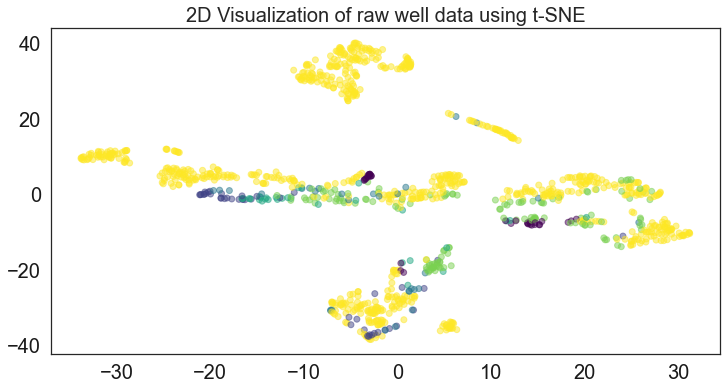

In [25]:
# Select the 0th feature: xs
xs = tsne_features[:,0]
# Select the 1st feature: ys
ys = tsne_features[:,1]
sns.set(rc={"figure.figsize": (12, 6)})
sns.set_style("white")
# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys, c=y,alpha=0.5, cmap= 'viridis' ) #
plt.title('2D Visualization of raw well data using t-SNE', size=20);
plt.tick_params(direction='out', length=6, width=2, colors='k')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True, which='major', axis='y', color="white", linewidth=1, zorder=1)
plt.show()

In [26]:
df.head()

,DEPTH,CGR,CPERM,DT,DTSM,GR,MSFL,NPHI,PEF,PHIE,RHOB,RT,SWE,Facies
0,852.857,4.91913,66.847839,74.5270,121.9698,33.3418,5.79568,0.079834,4.783249,0.072167,2.74411,10.27150,0.737652,1.0
1,853.010,9.99433,66.847839,88.8155,141.6838,53.4034,2.36973,0.151655,4.399977,0.146527,2.61065,2.98569,0.667624,1.0
2,853.162,20.56400,66.847839,99.0574,166.7016,72.0957,1.31614,0.231567,4.030700,0.220162,2.47339,1.38781,0.643816,5.0
3,853.314,31.71550,66.847839,104.7870,182.5868,78.3783,1.20371,0.287493,3.732858,0.276589,2.35818,1.22050,0.541710,5.0
4,853.467,37.70880,66.847839,104.8980,185.0199,70.4172,1.42773,0.297283,3.520631,0.301175,2.29512,1.55953,0.438343,5.0


## We will be predicting Sonic Log with the help of other logs
### First let us remove all the other extra features which are not neccesary for the prediction of the Sonic Log

In [50]:
df= df.drop(['SWE','Facies','DTSM','MSFL','PHIE','RT'],axis=1)

In [51]:
df.head()

,DEPTH,CGR,CPERM,DT,GR,NPHI,PEF,RHOB
0,852.857,4.91913,66.847839,74.5270,33.3418,0.079834,4.783249,2.74411
1,853.010,9.99433,66.847839,88.8155,53.4034,0.151655,4.399977,2.61065
2,853.162,20.56400,66.847839,99.0574,72.0957,0.231567,4.030700,2.47339
3,853.314,31.71550,66.847839,104.7870,78.3783,0.287493,3.732858,2.35818
4,853.467,37.70880,66.847839,104.8980,70.4172,0.297283,3.520631,2.29512


In [52]:
df.columns

Index(['DEPTH', 'CGR', 'CPERM', 'DT', 'GR', 'NPHI', 'PEF', 'RHOB'], dtype='object')

In [53]:
df= df[['DEPTH', 'CGR', 'CPERM', 'GR', 'NPHI', 'PEF', 'RHOB','DT']]

In [54]:
df.head()

,DEPTH,CGR,CPERM,GR,NPHI,PEF,RHOB,DT
0,852.857,4.91913,66.847839,33.3418,0.079834,4.783249,2.74411,74.5270
1,853.010,9.99433,66.847839,53.4034,0.151655,4.399977,2.61065,88.8155
2,853.162,20.56400,66.847839,72.0957,0.231567,4.030700,2.47339,99.0574
3,853.314,31.71550,66.847839,78.3783,0.287493,3.732858,2.35818,104.7870
4,853.467,37.70880,66.847839,70.4172,0.297283,3.520631,2.29512,104.8980


In [55]:
df.dtypes

DEPTH    float64
CGR      float64
CPERM    float64
GR       float64
NPHI     float64
PEF      float64
RHOB     float64
DT       float64
dtype: object

#### All are float

### Let us see the distribution of our Log Data and other parameters

### But before that let us normalize our data

In [57]:
to_norm= ['CGR','CPERM','GR','NPHI','PEF','RHOB']
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
scale.fit(df[to_norm])
new= scale.transform(df[to_norm])
new_df = pd.DataFrame(new,columns= to_norm)

In [59]:
new_df.head()

,CGR,CPERM,GR,NPHI,PEF,RHOB
0,-1.156776,-0.099312,-0.044368,-3.728682,3.255411,2.989338
1,-0.814028,-0.099312,1.420187,-2.423921,2.641479,2.068585
2,-0.100215,-0.099312,2.784779,-0.972179,2.049964,1.121614
3,0.652891,-0.099312,3.243428,0.043816,1.572875,0.326769
4,1.057643,-0.099312,2.662244,0.221668,1.232925,-0.108288


In [76]:
rest= ['DEPTH','DT']
rest_df= df[rest]
final= [rest_df,new_df]
final_df= pd.concat(final,axis=1)

In [78]:
final_df.columns

Index(['DEPTH', 'DT', 'CGR', 'CPERM', 'GR', 'NPHI', 'PEF', 'RHOB'], dtype='object')

In [79]:
final_df= final_df[['DEPTH', 'CGR', 'CPERM', 'GR', 'NPHI', 'PEF', 'RHOB','DT']]

In [80]:
final_df.head()

,DEPTH,CGR,CPERM,GR,NPHI,PEF,RHOB,DT
0,852.857,-1.156776,-0.099312,-0.044368,-3.728682,3.255411,2.989338,74.5270
1,853.010,-0.814028,-0.099312,1.420187,-2.423921,2.641479,2.068585,88.8155
2,853.162,-0.100215,-0.099312,2.784779,-0.972179,2.049964,1.121614,99.0574
3,853.314,0.652891,-0.099312,3.243428,0.043816,1.572875,0.326769,104.7870
4,853.467,1.057643,-0.099312,2.662244,0.221668,1.232925,-0.108288,104.8980


### Now our Data is ready for further visualisaitons and predictions

<AxesSubplot:xlabel='NPHI', ylabel='RHOB'>

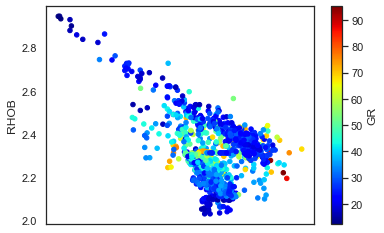

In [81]:
df.plot(kind='scatter',x='NPHI',y='RHOB' , c='GR', colormap='jet')

### Let us see how our Independent Variables are distributed

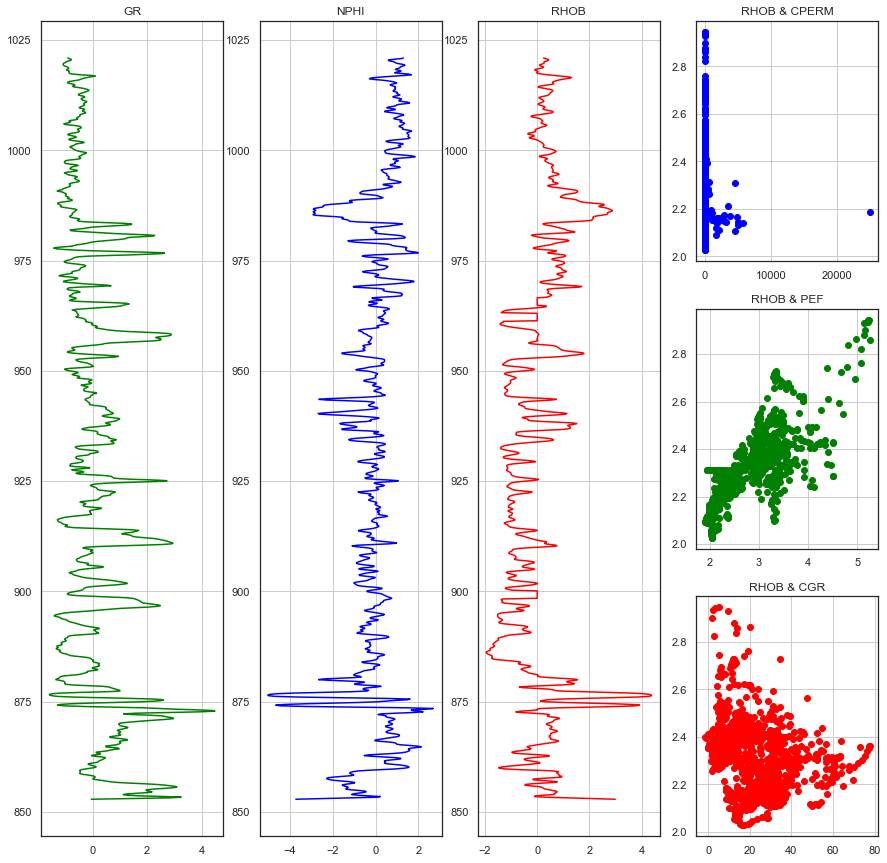

In [82]:
fig=plt.subplots(figsize=(15,15))
ax1=plt.subplot2grid((3,4), (0,0), rowspan=3,colspan=1)
ax2=plt.subplot2grid((3,4), (0,1), rowspan=3,colspan=1)
ax3=plt.subplot2grid((3,4), (0,2), rowspan=3,colspan=1)
ax4=plt.subplot2grid((3,4), (0,3), rowspan=1,colspan=1)
ax5=plt.subplot2grid((3,4), (1,3), rowspan=1,colspan=1)
ax6=plt.subplot2grid((3,4), (2,3), rowspan=1,colspan=1)

#GR
ax1.plot('GR','DEPTH', data=final_df, color='green')
ax1.set_title('GR')
ax1.grid()

# nphi
ax2.plot('NPHI','DEPTH', data=final_df, color='blue')
ax2.set_title('NPHI')
ax2.grid()

#RHOB
ax3.plot('RHOB','DEPTH', data=final_df, color='red')
ax3.set_title('RHOB')
ax3.grid()


# CROSSPLOT NPHI & RHOB

ax4.scatter(df['CPERM'], df['RHOB'], c='blue')
ax4.set_title('RHOB & CPERM')
ax4.grid()

ax5.scatter(df['PEF'], df['RHOB'], c='green')
ax5.set_title('RHOB & PEF')
ax5.grid()

ax6.scatter(df['CGR'], df['RHOB'], c= 'red')
ax6.set_title('RHOB & CGR')
ax6.grid()

### Let us visualize our Dependent Variable i.e. Sonic Log(DT)

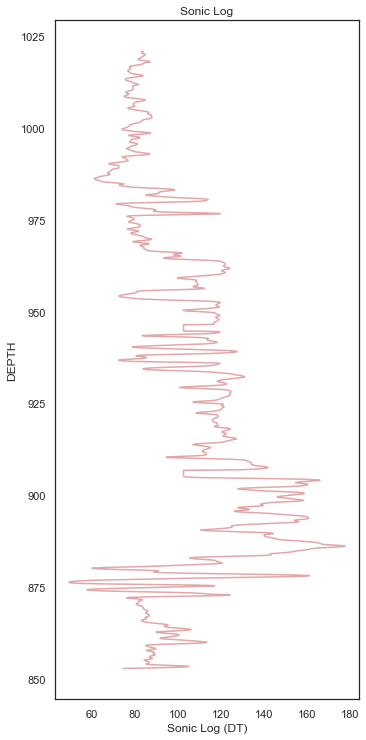

In [92]:
fig= plt.figure(figsize= (5,10))
ax1= fig.add_subplot(111)
ax1.plot(df["DT"], df["DEPTH"], color = 'r', alpha=0.5)
plt.tight_layout()
#plt.gca().invert_yaxis()
plt.xlabel('Sonic Log (DT)')
plt.ylabel('DEPTH')
plt.title('Sonic Log')
plt.show()

### We can smoother this plot a little bit before further processing

In [98]:
lst = list(df)
df1 = final_df.copy(deep=True)
window = 17
for i in lst:
    df1[i] = pd.Series(df1[i]).rolling(window=window, min_periods=1).mean()

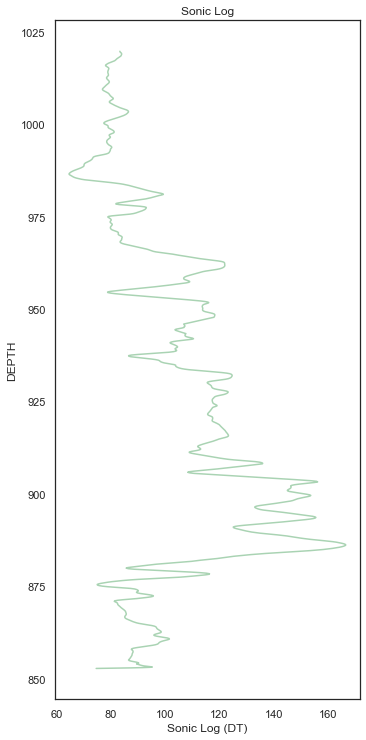

In [101]:
fig= plt.figure(figsize= (5,10))
ax1= fig.add_subplot(111)
ax1.plot(df1["DT"], df1["DEPTH"], color = 'g', alpha=0.5)
plt.tight_layout()
#plt.gca().invert_yaxis()
plt.xlabel('Sonic Log (DT)')
plt.ylabel('DEPTH')
plt.title('Sonic Log')
plt.show()

### Spikes are common in well log especially in Sonic log, so we smoothened the data with the help of the mean of the data.
### Let us compare both the logs before and after smoothing

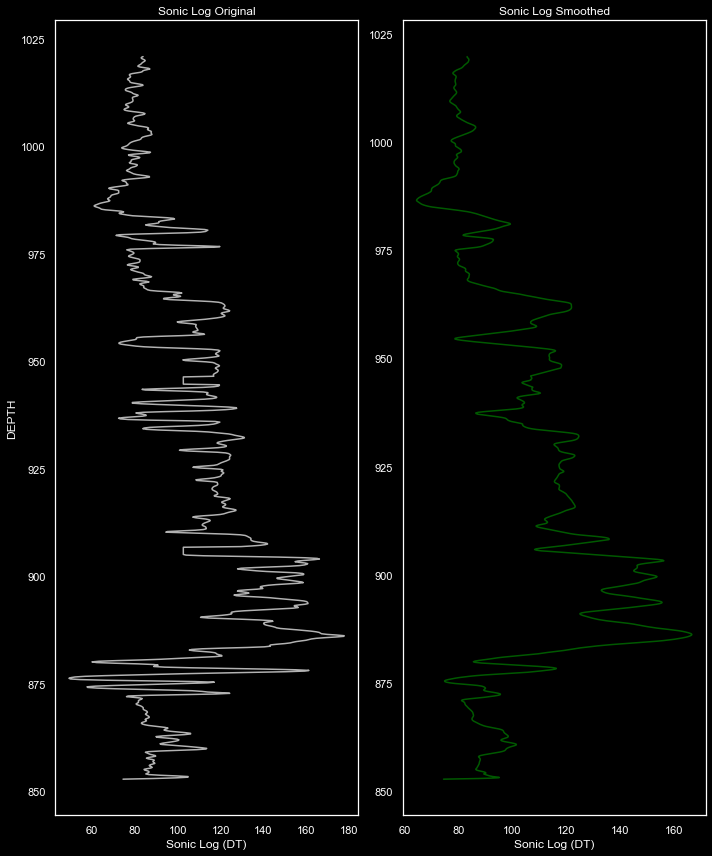

In [107]:
fig = plt.figure(figsize=(10,12))
ax1 = fig.add_subplot(121)
plt.title('Sonic Log Original')
ax1.plot( df["DT"], df["DEPTH"],'w', alpha=0.7)
plt.xlabel('Sonic Log (DT)')
plt.ylabel('DEPTH')

ax2 = fig.add_subplot(122)
plt.title('Sonic Log Smoothed')
ax2.plot( df1["DT"], df1["DEPTH"],'green', alpha=0.7)
plt.tight_layout()
plt.xlabel('Sonic Log (DT)')


plt.show()

### We can create a pair plot for understanding the following things:
- Is there any linear or direct relationship in betweeen the independent variables?
- Corellation between different variables i.e. how our data is distributed.

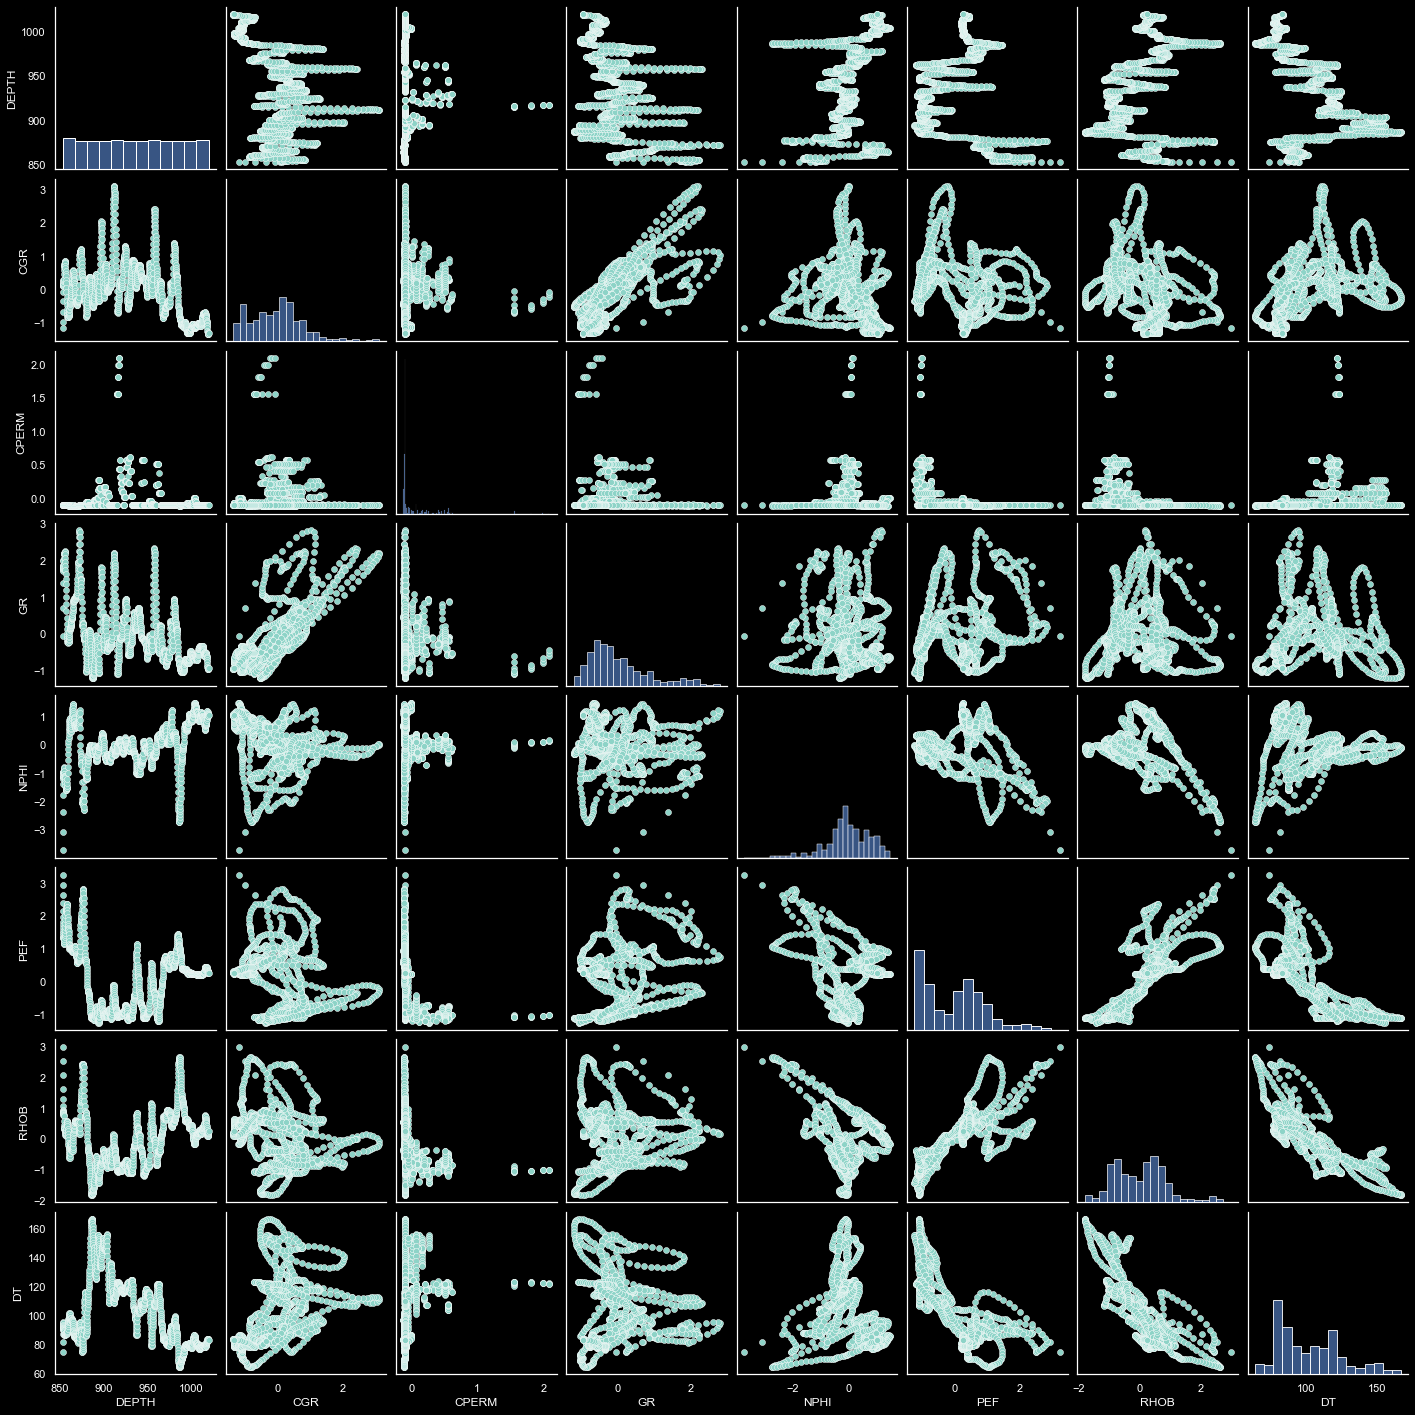

In [108]:
sns.pairplot(df1)

### Now we will try to predict our Sonic Log with the help of different independent variables

#### Let us split our data into Dependent and Independent Variables

In [109]:
x= df1.drop(['DT'],axis=1) #Independent var
y= df1['DT'] #Dependent var

#### We will split the data in to train and test data to compare the results. We will be running our model in trian data and then testing it on test data

In [117]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [119]:
print(x_train.shape,x_test.shape)

(772, 7) (332, 7)


### We will be using 2 different models:
- Linear Regression
- Random Forest Regressor


## Linear Regression
#### With HyperParameter Tuning

In [120]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(x_train,y_train)

LinearRegression(normalize=True)

In [121]:
# print the intercept
print(lin_reg.intercept_)
coeff_df = pd.DataFrame(lin_reg.coef_, x.columns, columns=['Coefficient'])
coeff_df

280.1435717403896


,Coefficient
DEPTH,-0.189404
CGR,8.369544
CPERM,-4.194075
GR,-9.033595
NPHI,-1.979777
PEF,-8.059643
RHOB,-9.783261


In [122]:
pred = lin_reg.predict(x_test)

### Using K Fold

In [142]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


kf = KFold(n_splits=6, random_state=1)


predictions = []
for train, test in kf.split(df1):
    # The predictors we're using the train the algorithm.
    train_predictors = x_train
    # The target we're using to train the algorithm.
    train_target = y_train
    # Training the algorithm using the predictors and target.
    lin_reg.fit(train_predictors, train_target)
    # We can now make predictions on the test fold
    test_predictions = lin_reg.predict(x_test)
    predictions.append(test_predictions)
    score = np.mean(cross_val_score(lin_reg, x_train, y_train , cv=6))
print (score)

C:\Users\khank\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


0.8540516585366156


## Random Forest Regressor

In [143]:
from sklearn.ensemble import RandomForestRegressor

In [144]:
rf = RandomForestRegressor(n_jobs=-1)

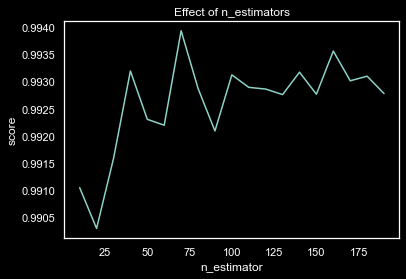

In [147]:
# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    rf.set_params(n_estimators=n)
    rf.fit(x_train, y_train)
    scores.append(rf.score(x_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [176]:
from sklearn.metrics import mean_squared_error
rf = RandomForestRegressor(n_estimators=75)
rf.fit(x_train, y_train)
pred1= rf.predict(x)
#mean_squared_error(y_test, pred1)

In [173]:
kf = KFold(n_splits=6, random_state=1)


predictions = []
for train, test in kf.split(df1):
    # The predictors we're using the train the algorithm.
    train_predictors = x_train
    # The target we're using to train the algorithm.
    train_target = y_train
    # Training the algorithm using the predictors and target.
    rf.fit(train_predictors, train_target)
    # We can now make predictions on the test fold
    test_predictions = rf.predict(x_test)
    predictions.append(test_predictions)
    score = np.mean(cross_val_score(rf, x_train, y_train , cv=6))
print (score)

C:\Users\khank\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


0.9908389227920953


### We will select Random Forest Regressor and Evaluate our Model

### For evaluation we will need a base line so that we are able to compare our results, here we will take baseline as the sonic log mean.

In [156]:
baseline = np.full(df1["DT"].shape, df1["DT"].mean()) # create baseline model.
print (baseline.shape)
print (baseline [:5])

(1104,)
[102.6850031 102.6850031 102.6850031 102.6850031 102.6850031]


### We will plot an actual comparison between our prediction and the baseline. The baseline consist of mean points at each sample 

In [174]:
prediction = np.concatenate(predictions, axis=0)
# The predictions are in three separate numpy arrays, so we need to concatenate them into one.  

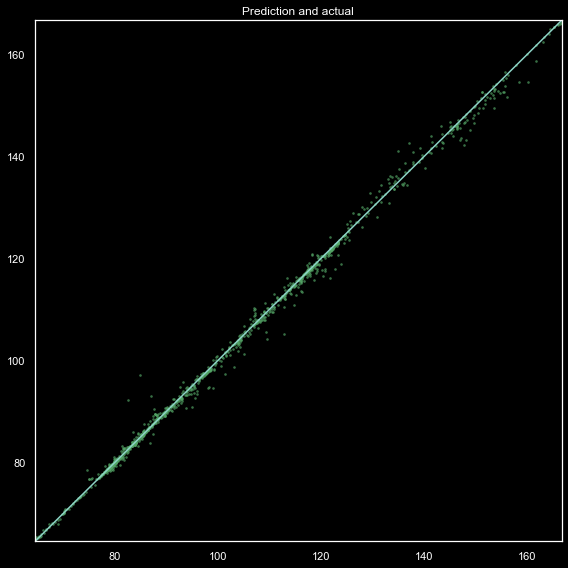

In [178]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(111)

ax1.scatter(y, pred1, s=3, color = 'g', alpha=0.5)
plt.title('Prediction and actual')
ax1.plot(np.linspace(df1["DT"].min(), df1["DT"].max(), df1["DT"].shape[0]), 
         np.linspace(df1["DT"].min(), df1["DT"].max(), df1["DT"].shape[0]))

ax1.set_xlim([df1["DT"].min() , df1["DT"].max()])
ax1.set_ylim([df1["DT"].min() , df1["DT"].max()])


plt.tight_layout()
plt.show()


### The diagonal line represents the correct values and the scatter points represents out predictions

### Adding our Predicted log to DataFrame

In [180]:
df1["predicted DT"] = pred1 # adding the prediction so it is in the final DataFrame
df2 = df1.sort_values(by ='DEPTH', ascending=[True])


In [181]:
df2.head()

,DEPTH,CGR,CPERM,GR,NPHI,PEF,RHOB,DT,predicted DT
0,852.857000,-1.156776,-0.099312,-0.044368,-3.728682,3.255411,2.989338,74.527000,78.462022
1,852.933500,-0.985402,-0.099312,0.687910,-3.076301,2.948445,2.528962,81.671250,80.372849
2,853.009667,-0.690340,-0.099312,1.386866,-2.374927,2.648951,2.059846,87.466633,85.556800
3,853.085750,-0.354532,-0.099312,1.851007,-1.770242,2.379932,1.626577,91.796725,90.882428
4,853.162000,-0.072097,-0.099312,2.013254,-1.371860,2.150531,1.279604,94.416980,94.134780


### Let us now plot the results

### Scatter Plot

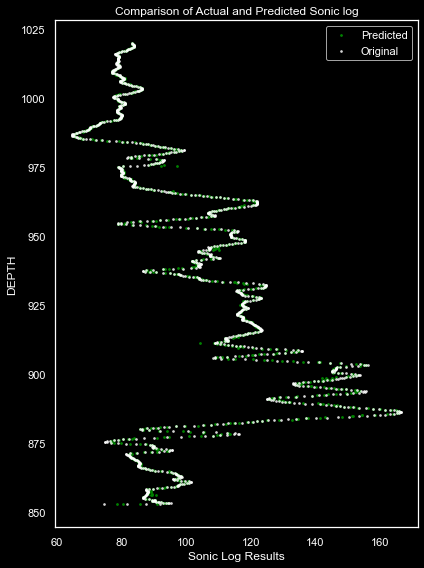

In [187]:
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(111)
plt.title('Comparison of Actual and Predicted Sonic log')
ax1.scatter(df2["predicted DT"], df2["DEPTH"], s = 3, color = 'green', label='Predicted')
ax1.scatter(df2["DT"], df2["DEPTH"], s = 3, color = 'white', alpha = 0.7, label='Original')
ax1.legend()
plt.xlabel('Sonic Log Results')
plt.ylabel('DEPTH')
plt.tight_layout()
plt.show()

### Normal Plot

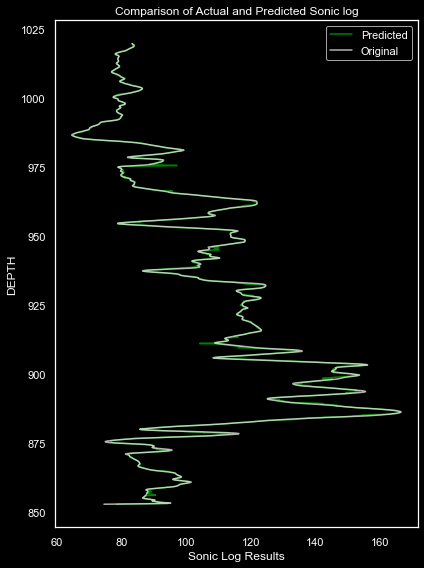

In [190]:
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(111)
plt.title('Comparison of Actual and Predicted Sonic log')
ax1.plot(df2["predicted DT"], df2["DEPTH"],  color = 'green', label='Predicted')
ax1.plot(df2["DT"], df2["DEPTH"],  color = 'white', alpha = 0.7, label='Original')
ax1.legend()
plt.xlabel('Sonic Log Results')
plt.ylabel('DEPTH')
plt.tight_layout()
plt.show()

### As we see from the plot that the Actual and Predicted results are almost same.

### We have an accuracy of 99% with Random Forest Regressor model